In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

# ---------------------------
# Load Dataset
# ---------------------------
data = pd.read_csv("student-mat.csv", sep=";")

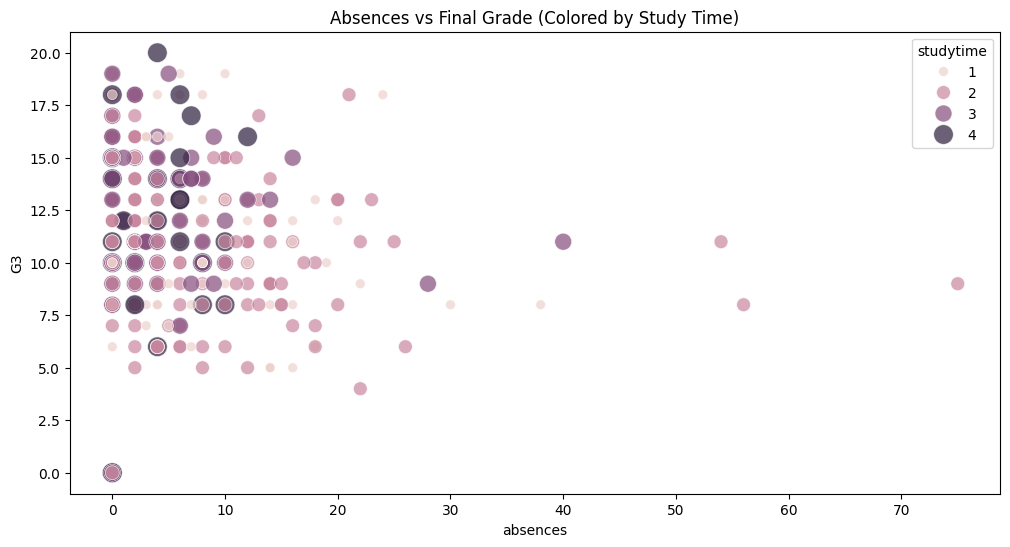

In [ ]:
# ---------------------------
# 1. Scatterplot
# ---------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="absences", y="G3", hue="studytime", size="studytime", sizes=(50,200), data=data, alpha=0.7)
plt.title("Absences vs Final Grade (Colored by Study Time)")
plt.show()

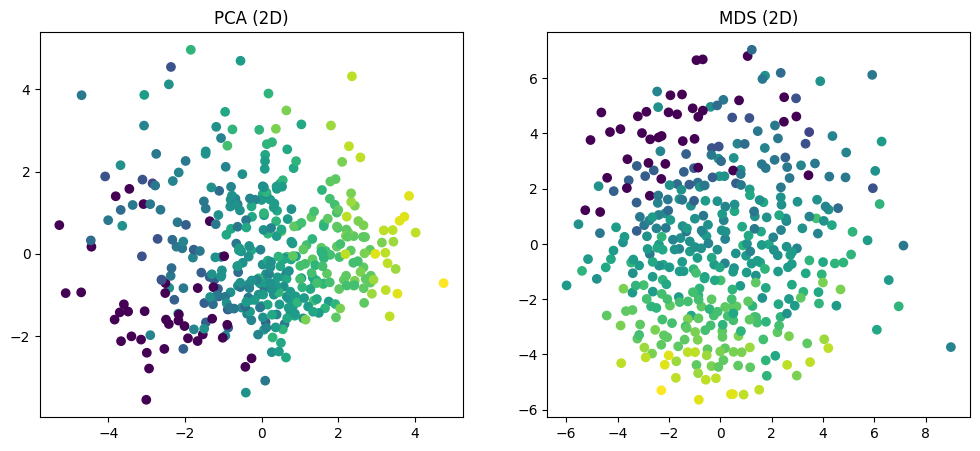

In [ ]:
# ---------------------------
# 2. PCA vs MDS
# ---------------------------
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
X = data[numeric_cols]

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# MDS (2D)
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Plot PCA vs MDS
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=data["G3"], cmap="viridis")
axes[0].set_title("PCA (2D)")
axes[1].scatter(X_mds[:,0], X_mds[:,1], c=data["G3"], cmap="viridis")
axes[1].set_title("MDS (2D)")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


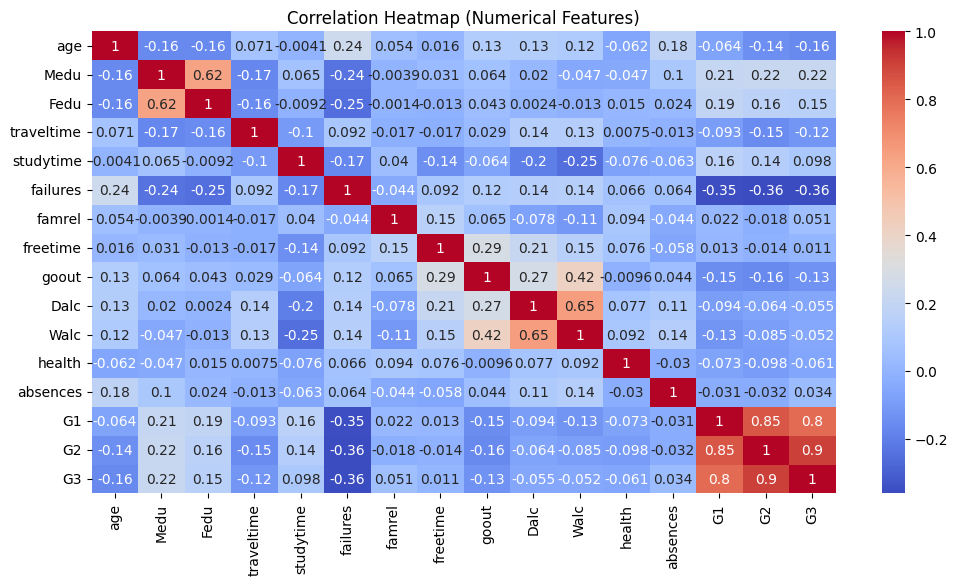

In [ ]:
# 3. Correlation Heatmap (Numerical)
# ---------------------------
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

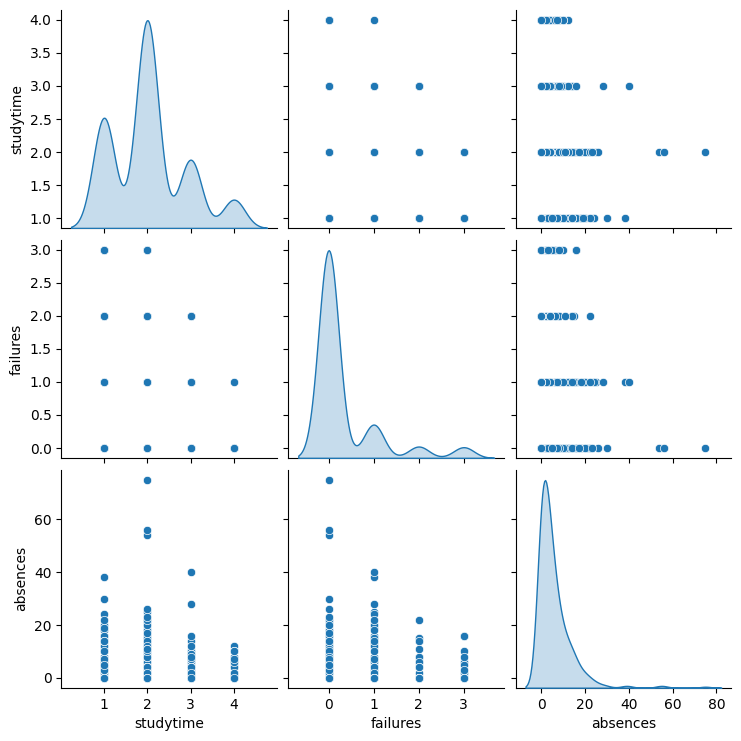

In [ ]:
# ---------------------------
# 4. Pairplot of Grades vs Study Habits
# ---------------------------
sns.pairplot(data[["studytime","failures","absences"]], diag_kind="kde")
plt.show()

/tmp/ipython-input-2771478498.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="studytime", y="G3", hue="sex", data=data, ci=None)


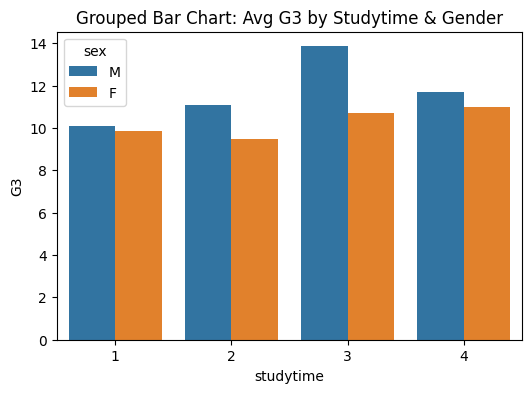

In [ ]:
# ---------------------------
# 5. Grouped Bar Chart
# ---------------------------
plt.figure(figsize=(6,4))
sns.barplot(x="studytime", y="G3", hue="sex", data=data, ci=None)
plt.title("Grouped Bar Chart: Avg G3 by Studytime & Gender")
plt.show()

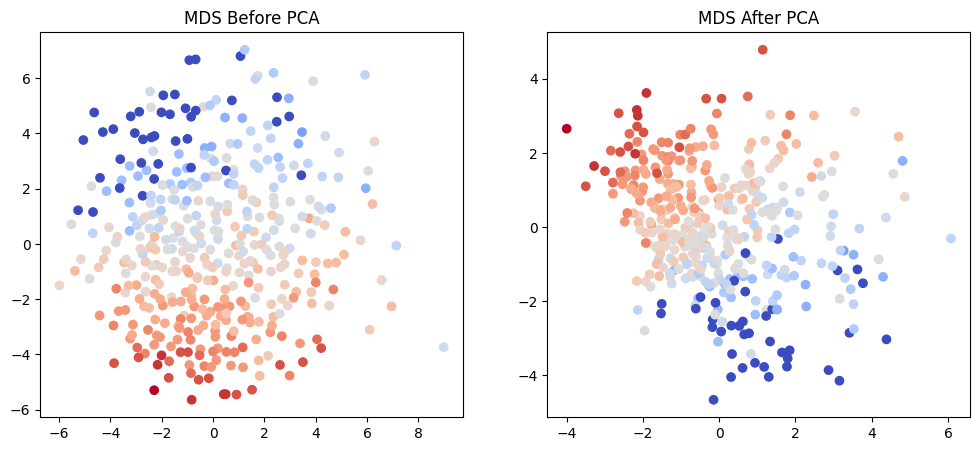

In [ ]:
# ---------------------------
# 6. MDS Before PCA vs After PCA
# ---------------------------
# MDS before PCA already done above (X_mds)

# MDS on PCA-reduced data
mds_after = MDS(n_components=2, random_state=42)
X_mds_after = mds_after.fit_transform(X_pca)

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(X_mds[:,0], X_mds[:,1], c=data["G3"], cmap="coolwarm")
axes[0].set_title("MDS Before PCA")
axes[1].scatter(X_mds_after[:,0], X_mds_after[:,1], c=data["G3"], cmap="coolwarm")
axes[1].set_title("MDS After PCA")
plt.show()


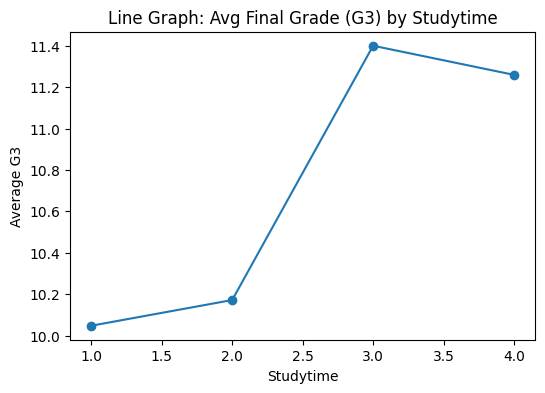

In [ ]:
# ---------------------------
# 7. Line Graph
# ---------------------------
plt.figure(figsize=(6,4))
data.groupby("studytime")["G3"].mean().plot(marker="o", linestyle="-")
plt.title("Line Graph: Avg Final Grade (G3) by Studytime")
plt.xlabel("Studytime")
plt.ylabel("Average G3")
plt.show()


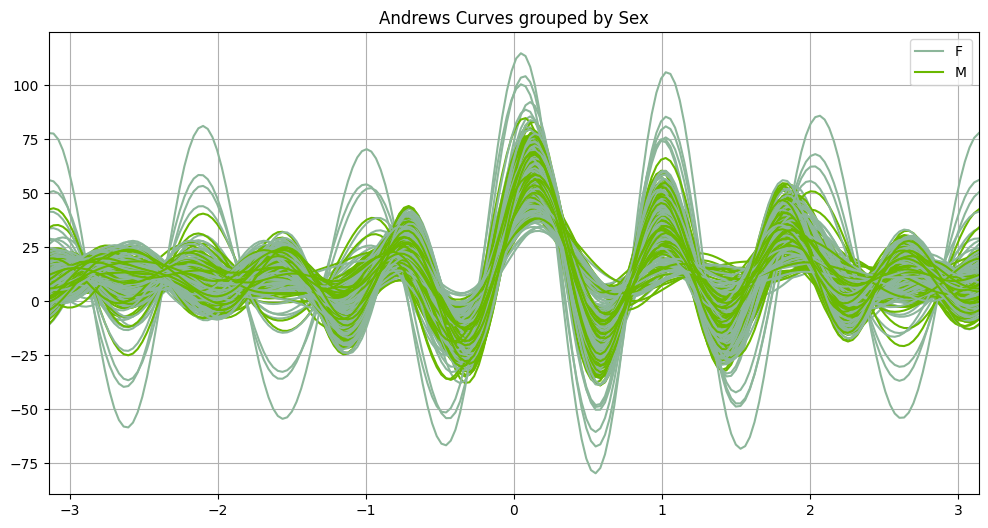

In [ ]:
import pandas as pd
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("student-mat.csv", sep=';')

# Choose a target column for grouping (e.g., 'sex' or 'school')
# Convert categorical columns to numeric if needed
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric['sex'] = df['sex']  # Add a categorical column for grouping

# Plot Andrews Curves
plt.figure(figsize=(12, 6))
andrews_curves(df_numeric, 'sex')
plt.title("Andrews Curves grouped by Sex")
plt.show()


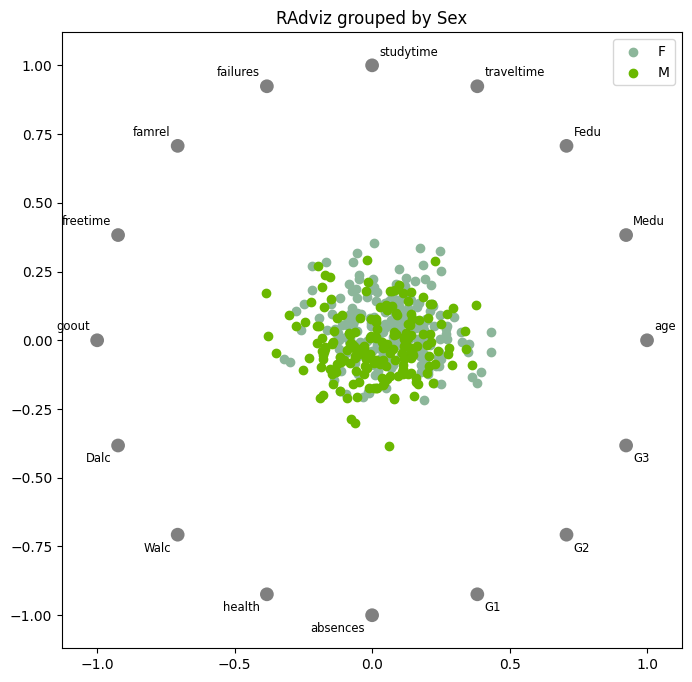

In [ ]:
from pandas.plotting import radviz

# Use numeric features and a categorical target
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric['sex'] = df['sex']  # Add a categorical column for grouping

# Plot RAdviz
plt.figure(figsize=(8, 8))
radviz(df_numeric, 'sex')
plt.title("RAdviz grouped by Sex")
plt.show()
